In [2]:
from packages import *
%matplotlib inline

In [3]:
from collections import Counter

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
run = True
save = True
load = False

In [6]:
import random

In [7]:
export_precision = np.float32

In [8]:
subject = 1
sub_dir = os.path.join(DUMP_DIR, get_subject_dir(subject))
func_stim_link = load_pickle('func_stim_link.p', sub_dir)
stim_labels = load_pickle('stimulus-labels.p')

In [9]:
def batchify(l, batch_size):
    batches = []
    for i in xrange(0, len(l), batch_size):
        batches.append(l[i:i+batch_size])
    return batches

# Building the labels for our dataset

## Different datasets we will consider are: 

##### (a) VGG16 outputs (100d vector) for each stimuli
##### (b) one-hot VGG16 outputs for each stimuli
##### (c) stimuli images resized and preprocessed


### (a) VGG16 outputs

In [75]:
version = 'a'

In [76]:
if run:
    vgg_preds = load_pickle('vgg-preds.p')

In [77]:
Y_a = {}
for ses in SESSIONS:
    ses_data = []
    for f in func_stim_link[ses]:
        ses_data.append(vgg_preds[f][0,])
    Y_a[ses] = np.array(ses_data)
    print ses,

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15


In [78]:
Y_a[1].shape

(370, 1000)

In [ ]:
if save:
    for ses in SESSIONS:
        numpy_save(Y_b[ses], 'Y_sub-{}_ses-{}_{}'.format(subject, ses, version), os.path.join(DATASET_Y_DIR, version))

### (b) one-hot VGG16 outputs

In [79]:
version = 'b'

In [80]:
if run:
    one_hot_vgg_preds = load_pickle('one_hot-vgg-preds.p')

n02028035_607.JPEG


[(u'n02028035', u'redshank', 0.99987113),
 (u'n02025239', u'ruddy_turnstone', 9.355033e-05),
 (u'n02033041', u'dowitcher', 2.9422547e-05)]

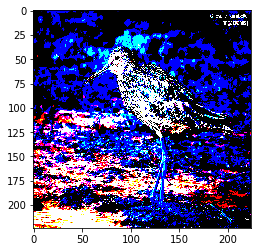

In [81]:
x = random.choice(vgg_preds.keys())
print x
plt.imshow(preprocess_image(x, (224, 224))[0,])
vgg16.decode_predictions(vgg_preds[x])[0][0:3]

In [82]:
Y_b = {}
for ses in SESSIONS:
    ses_data = []
    for f in func_stim_link[ses]:
        ses_data.append(one_hot_vgg_preds[f])
    Y_b[ses] = np.array(ses_data)
    print ses,

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15


In [83]:
Y_b[1].shape

(370,)

In [53]:
if save:
    for ses in SESSIONS:
        numpy_save(Y_b[ses], 'Y_sub-{}_ses-{}_{}'.format(subject, ses, version), os.path.join(DATASET_Y_DIR, version))

### (c) stimulus image processed, resized and flattened

In [10]:
version = 'c'

In [11]:
if run:
    stimulus_processed_resized = load_pickle('stimulus-processed-resized-flat.p')

In [12]:
Y_c = {}
for ses in SESSIONS:
    ses_data = []
    for f in func_stim_link[ses]:
        ses_data.append(stimulus_processed_resized[f])
    Y_c[ses] = np.array(ses_data)
    print ses,

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15


In [13]:
if save:
    for ses in SESSIONS:
        numpy_save(Y_c[ses], 'Y_sub-{}_ses-{}_{}'.format(subject, ses, version), os.path.join(DATASET_Y_DIR, version))

### (d) layer activations from vgg

In [10]:
version = 'd'

In [11]:
sample_num = 1000

In [12]:
def generate_random_sample_indices(shape):
    channels = shape[-1]
    sample_per_channel = int(math.ceil(sample_num/channels))
    dim = shape[1]
    indexes = []
    for channel in xrange(channels):
        channel_samples = []
        for _ in range(sample_per_channel):
            ix = np.where(arrays[dim].reshape(dim, dim) == np.random.choice(arrays[dim]))
            channel_samples.append((ix[0][0], ix[1][0]))
        indexes.append(channel_samples)
    return np.array(indexes)

In [17]:
from tensorflow.keras.applications import vgg16
from get_activations import get_activations
from b4_stim_preprocessing import preprocess_image

In [18]:
vgg = vgg16.VGG16(weights = 'imagenet')

In [ ]:
stim_labels = load_pickle('stimulus-labels.p')

In [19]:
layers = [layer.name for layer in vgg.layers if 'conv' in layer.name and 'block1' not in layer.name and 'block2' not in layer.name]
a = get_activations(vgg, preprocess_image('childsroom2.jpg', (224, 224)), K, layers)
layers = {}
for key in a.keys():
    layers[key] = a[key].shape

NameError: global name 'stim_labels' is not defined

In [ ]:
Y_d = {}

In [ ]:
vgg_activation_masks = {}
arrays = {14: np.arange(14**2), 28: np.arange(28**2), 56: np.arange(56**2)}
for layer in layers:
    vgg_activation_masks[layer] = generate_random_sample_indices(layers[layer])
    vgg_activations[layer]= []

In [18]:
for ses in SESSIONS:
    ses_data = {}
    for f in func_stim_link[ses]:
        i+=1
        a = get_activations(vgg, preprocess_image(f, (224, 224)), K, layers.keys())
        for layer in a:
            layer_samples = []
            for channel in xrange(layers[layer][-1]):
                for sample in xrange(vgg_activation_masks[layer].shape[1]):
                    layer_samples.append(a[layer][0, vgg_activation_masks[layer][channel, sample, 0], vgg_activation_masks[layer][channel, sample, 1], channel])
            ses_data[layer].append(np.array(layer_samples).astype(export_precision))
        ses_data.append(stimulus_processed_resized[f])
    Y_d[ses] = np.array(ses_data)
    print ses,

* * * * * * * * * *  2.0 * * * * * * * * * *  4.0 * * * * * * * * * *  6.0 * * * * * * * * * *  8.0 * * * * * * * * * *  10.0 * * * * * * * * * *  12.0 * * * * * * * * * *  14.0 * * * * * * * * * *  16.0 * * * * * * * * * *  18.0 * * * * * * * * * *  20.0 * * *

KeyboardInterrupt: 

In [18]:
if save:
    for ses in SESSIONS:
        numpy_save(Y_b[ses], 'Y_sub-{}_ses-{}_{}'.format(subject, ses, version), os.path.join(DATASET_Y_DIR, version))